<a href="https://colab.research.google.com/github/priyadarshighosh/Feature_Engineering/blob/main/DAY04/FE_Binning_DAY04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BINNING ( DISCRETIZATION )

IMPORTING PYTHON DATASCIENCE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


IMPORTING PYTHON MACHINE LEARNING LIBRARIES

In [ ]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest,chi2                 #feature selection                     #standard scaling
from sklearn.tree import DecisionTreeClassifier

UPLOADING THE DATASET

In [ ]:
from google.colab import files    # we are importing the file from the device
uploaded = files.upload()


In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')   #fitting the data in the df dataframe
df.head()


we are just using 3 columns Age , Fare and Survived

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv', usecols= ['Age','Fare','Survived'])

In [ ]:
df.head()

Dropping the rows that have null values

# DROPPING ROWS WITH NULL VALUES

In [ ]:
df.dropna(inplace=True)

df.head()

In [ ]:
df.shape

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

# TRAIN  /  TEST SPLIT

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train

In [ ]:
y_test

# Without BINNING TRANSFORMATION

USING DECISION TREE

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

ACCURACY IS 62.9 AND CV SCORE IS 63.3

# USING BINNING TRANSFORMATION

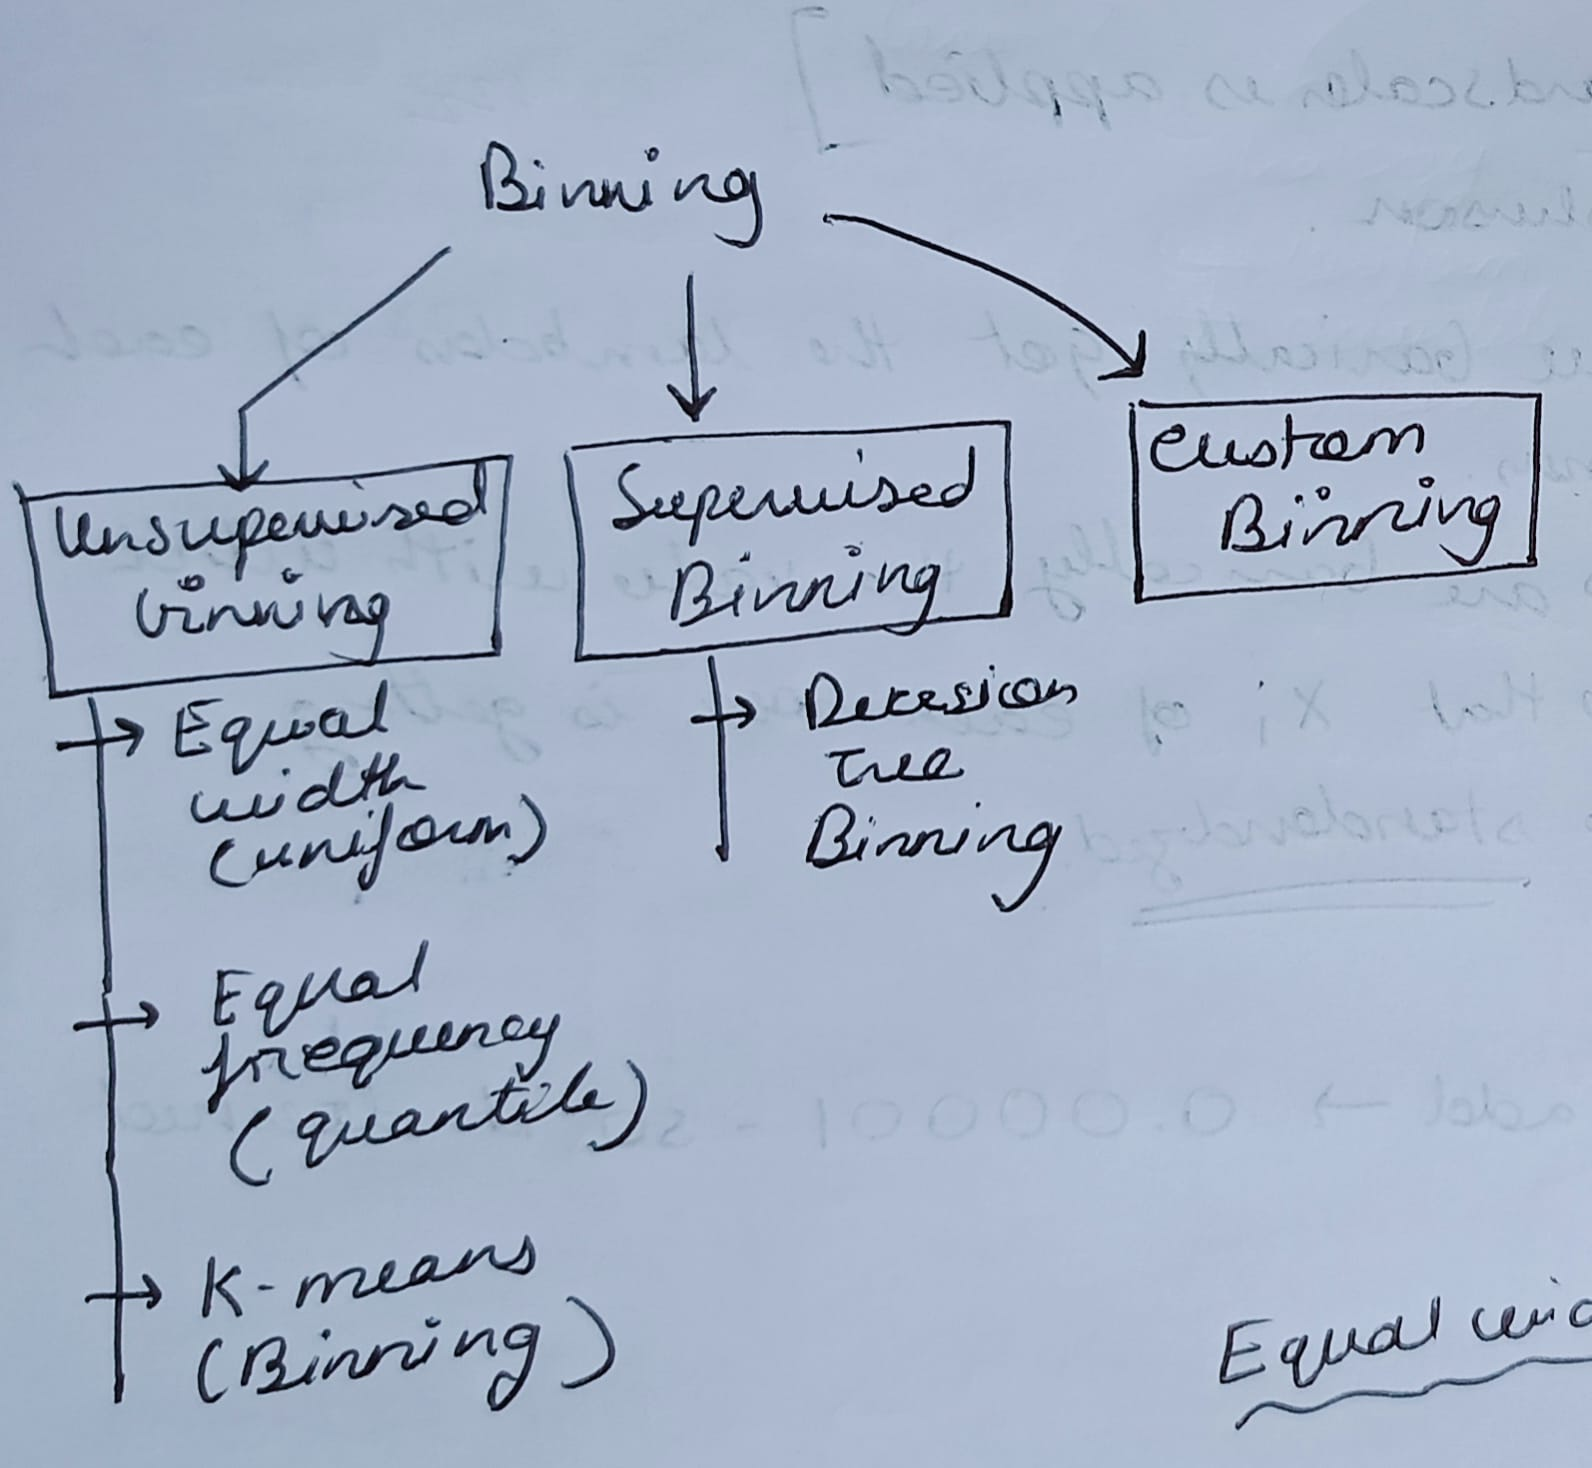

We applied the K-means Binning for both the Age and Fare

we gave no of bins as 15 , Encoding as ordinal ( IT CAN BE OF 2 TYPES ORDINAL OR ONE HOT ENCODING )

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

WE ARE JOINING THE 2 COLUMNS

In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

TRAINING THE NEW X_train and New X_test after transformation

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

this gives information about the 2 transformers

In [ ]:
trf.named_transformers_

THIS tells us about the transformed data

bin_edges means " in what interval of values does it contain 10 perc of the total data " as our bin size was 10 ...100/10 = 10

if we had given our bin size as 20 then it would see " what are the ranges in which 5 percentile of the total values are coming

why 5 percentile cuz 100/bins ie 100/20 = 5

In [ ]:
trf.named_transformers_['first'].bin_edges_


In [ ]:
trf.named_transformers_['first'].n_bins      #no of bins are ther = 10

# Output and merger of data

merging the age , age_trf , fare and fare_trf together

In [ ]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],           #1st column of X_train_trf thats is age
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]           #2nd column of X_train_trf thats is fare
})

In [ ]:
output.sample(10)

adding the labels to the data to see in which bin each data is lying for age and fare

In [ ]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(10)

# Prediction , Accuracy on Transformed data

cross validation on the transformed data

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred)

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

# WE PUT THIS INTO THE DISCRETIZE FUNCTION

# DREW THE COMPARISION GRAPH

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()



THIS SHOWS HOW QUATILE BINNING TRANSFORMS THE DATA

In [ ]:
discretize(10,'quantile')

THIS SHOWS HOW UNIFORM  BINNING TRANSFORMS THE DATA

In [ ]:
discretize(10,'uniform')

THIS SHOWS HOW K-MEANS BINNING TRANSFORMS THE DATA

In [ ]:
discretize(10,'kmeans')